<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 2</b></center>    
<pre>    

# EDA & Pipeline: Google Play Store Apps

**Dataset:** Google Play Store Apps (Available on Kaggle) <BR>
**Objective:** Transform raw, messy data into clean, actionable insights using Pandas and Scikit-Learn pipelines.<BR>
**Focus:** Data Cleaning, String Sanitization, Advanced Imputation, Correlation, and Pipelines.<BR>

### 1. Setup & Initialization

**Exercise 1: Import Dependencies**
* Import `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
* Set pandas options to display all columns (visual aid).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Exercise 2: Data Loading & Initial Inspection**
* Load the `googleplaystore.csv` file.
* Display the first 5 rows.
* **Check:** Look closely at the `Installs`, `Size`, and `Price` columns. Notice they are currently Objects (strings), not numbers.

In [3]:
df = pd.read_csv('googleplaystore.csv')
print(df.head())
print(df.describe())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

### 2. Data Integrity Check

**Exercise 3: Audit Data Types and Missing Values**
* Use a single command to view data types (`dtypes`) and non-null counts.
* Calculate the *percentage* of missing values for each column.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
missing_values = (
    df.isna()
      .mean()
      .mul(100)
      .round(2)
      .sort_values(ascending=False)
)
print(missing_values)


Rating            13.60
Current Ver        0.07
Android Ver        0.03
Type               0.01
Content Rating     0.01
App                0.00
Category           0.00
Reviews            0.00
Size               0.00
Installs           0.00
Price              0.00
Genres             0.00
Last Updated       0.00
dtype: float64


**Exercise 4: Handling Duplicates**
* Duplicate entries skew results. Check for duplicate rows.
* Drop duplicates, keeping the *first* occurrence. Verify the shape change.

In [6]:
duplicate_count = df.duplicated().sum()
rows_before = len(df)
df = df.drop_duplicates()
rows_after = len(df)
print(f"Duplicate rows removed: {duplicate_count}")
print(f"Rows before/after drop: {rows_before} → {rows_after}")


Duplicate rows removed: 483
Rows before/after drop: 10841 → 10358


### 3. Advanced String Sanitization (Crucial Step)

**Exercise 5: Cleaning the 'Installs' Column**
* The `Installs` column contains characters like `+` and `,` (e.g., "10,000+").
* Remove these characters.
* Convert the column to a numeric integer type.

In [7]:
df['Installs'] = (
    df['Installs']
      .astype(str)
      .str.replace('+', '', regex=False)
      .str.replace(',', '', regex=False)
)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').astype('Int64')
print(df['Installs'].head())


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: Int64


In [8]:
# use to_numeric to convert to int

**Exercise 6: Cleaning the 'Price' Column**
* The `Price` column contains the `$` symbol (e.g., "$4.99").
* Remove the symbol.
* Convert the column to a `float`.

In [9]:
df['Price'] = (
    df['Price']
      .astype(str)
      .str.replace('$', '', regex=False)
      .str.replace(',', '', regex=False)
)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
print(df['Price'].head())


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64


**Exercise 7: Complex Logic - Sanitizing 'Size'**
* The `Size` column is messy. It contains 'M' (Megabytes), 'k' (kilobytes), and string 'Varies with device'.
* **Task:** Write a function (or apply lambda) to:
    1.  Replace 'k' with 'e+3' and 'M' with 'e+6'.
    2.  Coerce 'Varies with device' to `NaN`.
    3.  Convert the string to a number.

In [10]:
def clean_size(value):
    text = str(value).strip().replace(',', '')
    if text.lower() == 'varies with device':
        return np.nan
    if text.endswith(('M', 'm')):
        return float(text[:-1]) * 1_000_000
    if text.endswith(('K', 'k')):
        return float(text[:-1]) * 1_000
    try:
        return float(text)
    except ValueError:
        return np.nan


df['Size'] = df['Size'].apply(clean_size)
print(df['Size'].head())


0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64


### 4. Advanced Imputation

**Exercise 8: Analyzing Missing 'Rating'**
* The `Rating` column has missing values.
* **Visualize** the distribution of Ratings using a Histogram or KDE plot to decide between Mean vs Median imputation.

<Axes: xlabel='Rating', ylabel='Count'>

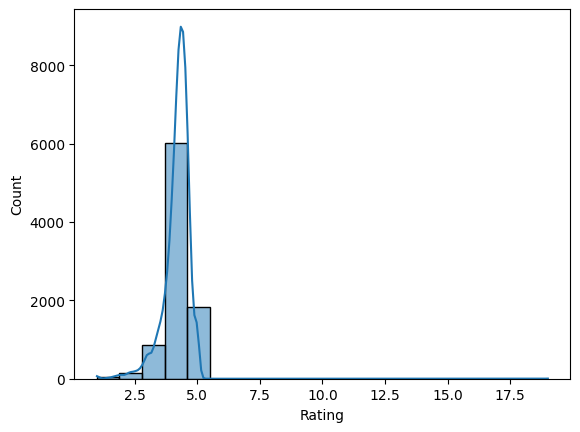

In [11]:
sns.histplot(df["Rating"].dropna(),bins=20,kde=True)

**Exercise 9: Group-Specific Imputation**
* Fill missing `Rating` values with the **Median Rating** of the specific `Category` the app belongs to.
* *Example:* If a "Business" app is missing a rating, fill it with the median rating of all "Business" apps.

In [12]:
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))
print(df['Rating'].head(20))

#After this use transform Method

0     4.1
1     3.9
2     4.7
3     4.5
4     4.3
5     4.4
6     3.8
7     4.1
8     4.4
9     4.7
10    4.4
11    4.4
12    4.2
13    4.6
14    4.4
15    3.2
16    4.7
17    4.5
18    4.3
19    4.6
Name: Rating, dtype: float64


**Exercise 10: Drop Remaining NaNs**
* For the remaining columns with minimal missing data (like `Current Ver`), simply drop the rows containing NaNs to ensure a clean dataset for correlation.

In [13]:
critical_cols = [col for col in ['Current Ver', 'Android Ver'] if col in df.columns]
rows_before = len(df)
df = df.dropna(subset=critical_cols)
rows_after = len(df)
print(f"Rows before/after drop: {rows_before} → {rows_after}")
print(df[critical_cols].isna().sum())


Rows before/after drop: 10358 → 10347
Current Ver    0
Android Ver    0
dtype: int64


### 5. Correlation & Visualization

**Exercise 11: Correlation Matrix**
* Generate a correlation matrix for the numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, `Price`).

In [14]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Rating,Size,Installs,Price
Rating,1.000000,0.065161,0.045268,-0.019582
Size,0.065161,1.000000,0.168805,-0.023818
Installs,0.045268,0.168805,1.000000,-0.011154
Price,-0.019582,-0.023818,-0.011154,1.000000


**Exercise 12: Heatmap Visualization**
* Visualize the correlation matrix using a Seaborn Heatmap.
* Annotate the values.

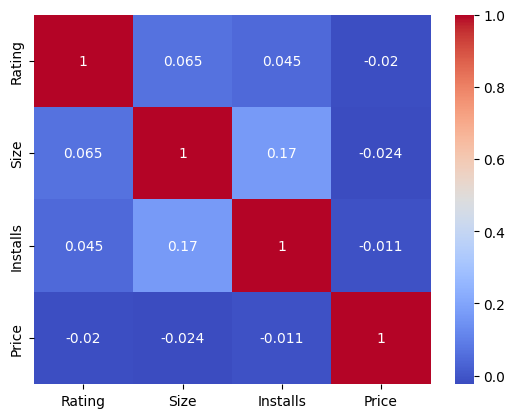

In [15]:
# Hint: sns.heatmap
sns.heatmap(correlation_matrix, annot = True, cmap="coolwarm")
plt.show()

**Exercise 13: Scatter Plot Analysis**
* Create a Scatter Plot to analyze the relationship between `Reviews` and `Installs`.
* **Note:** You might need to use a log scale for the axes if the data is skewed.

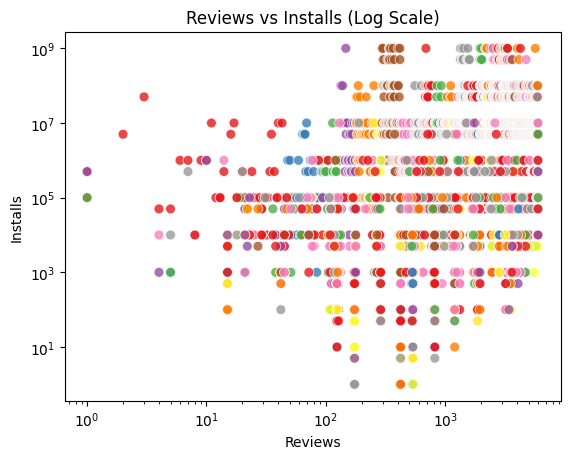

In [16]:
# sns.scatterplot(data=df,x='Reviews',y='Installs')
# plt.xscale('log')
# plt.yscale('log')
# plt.title('Reviews vs Installs (Log Scale)')
# plt.show()
ax = sns.scatterplot(
    data=df,
    x='Reviews',
    y='Installs',
    hue='Category',
    palette='Set1',
    alpha=0.8,
    s=50,
    legend=False
)

plt.xscale('log')
plt.yscale('log')
plt.title('Reviews vs Installs (Log Scale)')
plt.show()



**Exercise 14: Categorical Aggregation**
* Create a Bar Plot showing the top 10 Categories by **Total Installs**.

/var/folders/3r/v2dbpgqn6wg47l8trfqk21lr0000gn/T/ipykernel_9083/3635459512.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cats.index, y=top_cats.values, palette='viridis')


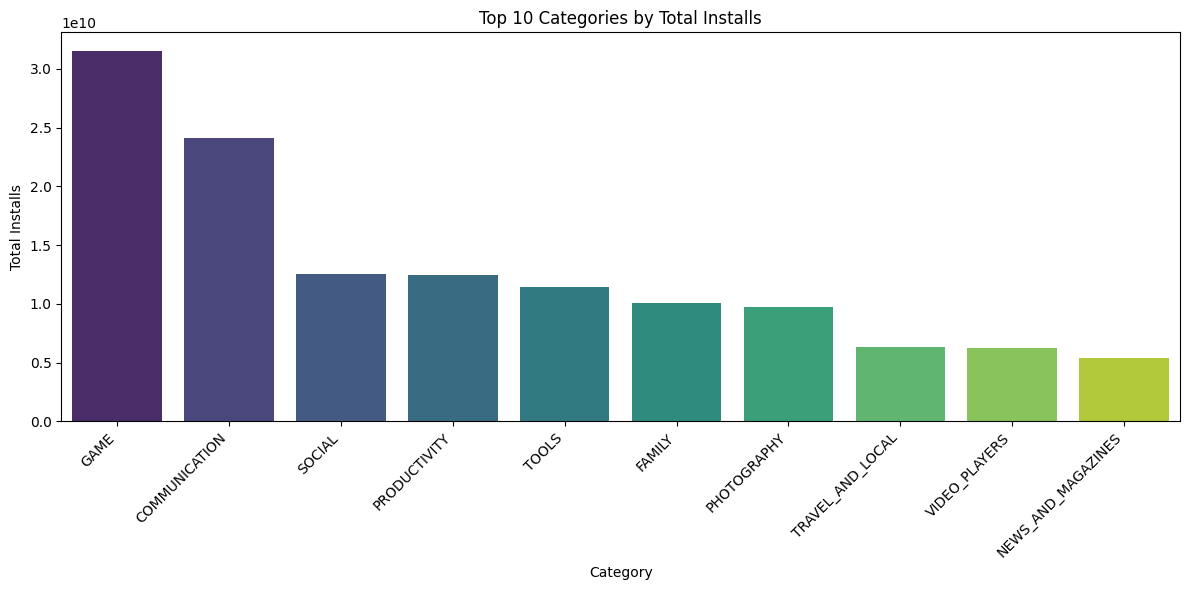

In [19]:
top_cats = (
    df.groupby('Category')['Installs']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cats.index, y=top_cats.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.tight_layout()
plt.show()
df.to_csv('googleplaystore_cleaned.csv', index=False)


### 6. Building a Sklearn Pipeline

**Exercise 15: Preprocessing Pipeline**
* Imagine you want to predict the `Rating` (Target).
    1.  StandardScales the numerical features (`Reviews`, `Size`, `Installs`, `Price`).
    2.  OneHotEncodes the categorical feature (`Category`, `Content Rating`).
* Display the pipeline object.

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['Reviews', 'Size', 'Installs', 'Price']
categorical_features = ['Category', 'Content Rating']
model_features = numerical_features + categorical_features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X = df.dropna(subset=model_features)[model_features]
X_transformed = pipeline.fit_transform(X)
print(pipeline)
print(X_transformed.shape)
print(X.shape)


ModuleNotFoundError: No module named 'sklearn'

# Without Pipline

# With Pipline(Optional part)